<a href="https://colab.research.google.com/github/JinLeeGG/AI_Project_Preparation/blob/main/4.%20Deep%20Learning/4.%20number%20handwriting%20dataset/4_number_handwriting_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ryuzyproject.tistory.com/75?category=1177429

dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

# 1. 손 글씨 숫자 데이터셋
손글씨 숫자 데이터셋은 0부터 9까지의 숫자를 손글씨로 쓴 흑백 이미지로 구성되어 있으며, 각 이미지는 8x8 픽셀 크기의 64차원 벡터로 표현됩니다. 각 픽셀 값은 0(흰색)에서 16(검은색)까지의 명암값을 가집니다. 이 데이터는 총 1797개의 샘플로 이루어져 있으며, 각 샘플에는 숫자 클래스(0~9)가 레이블로 붙어 있습니다. 주로 분류 알고리즘을 학습시키거나 데이터 시각화, 차원 축소 기법 등을 실험하는 데 사용됩니다.



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # dataset을 불러오기 위한 load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader # batch 단위로 나누어서 데이터셋을 모델에 제공

In [2]:
# 데이터 불러오기
digits = load_digits()

# 데이터 보기
X_data = digits['data'] # 밝기 데이터가 들어있다.
X_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
y_data = digits['target']
y_data # 정답이 들어있다.

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
print(X_data.shape) # 이미지 자체
print(y_data.shape) # 정답

(1797, 64)
(1797,)


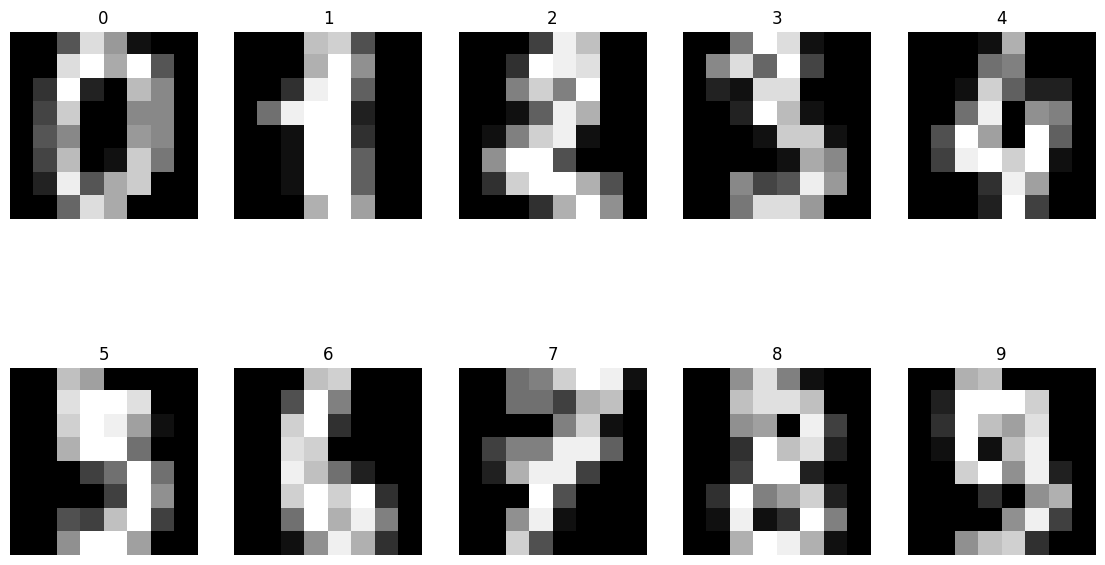

In [5]:
# 데이터 보기
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8)) # 축을 2행 5열

for i, ax in enumerate(axes.flatten()): # 일렬로 만드는 과정 (10바퀴를 돌린다.)
    ax.imshow(X_data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(y_data[i])
    ax.axis('off')

In [6]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data) # 결과가 class로 나올것이기 때문에 LongTensor로 넣어준다.

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(x_train.shape, y_train.shape) # train data
print(x_test.shape, y_test.shape) # test data

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


# 2. 데이터 로더
데이터로더(Data Loader)는 데이터셋을 효율적으로 관리하고, 모델 학습 과정에서 데이터를 쉽게 가져올 수 있도록 도와주는 도구입니다. 일반적으로 데이터셋을 배치(batch) 단위로 나누어 모델에 제공하며, 데이터의 크기가 클 경우에도 메모리 효율적으로 처리할 수 있도록 설계되었습니다. 데이터 증강, 셔플링, 병렬 처리와 같은 기능을 지원하여 학습 성능을 향상시키고, 모델 학습과 평가 시 일관된 데이터 제공 방식을 유지합니다. 딥러닝 프레임워크에서는 PyTorch의 DataLoader나 TensorFlow의 tf.data 같은 도구를 통해 쉽게 사용할 수 있습니다.

### ※ 데이터로더의 주요 역할

1. 배치 처리: 데이터를 지정된 크기의 배치로 나누어 모델에 제공.
2. 셔플링: 데이터 순서를 무작위로 섞어 과적합 방지.
3. 병렬 처리: num_workers 옵션을 통해 데이터를 병렬로 로드하여 속도 향상.
4. 반복 처리: 학습 epoch 동안 데이터를 자동으로 반복해서 제공.

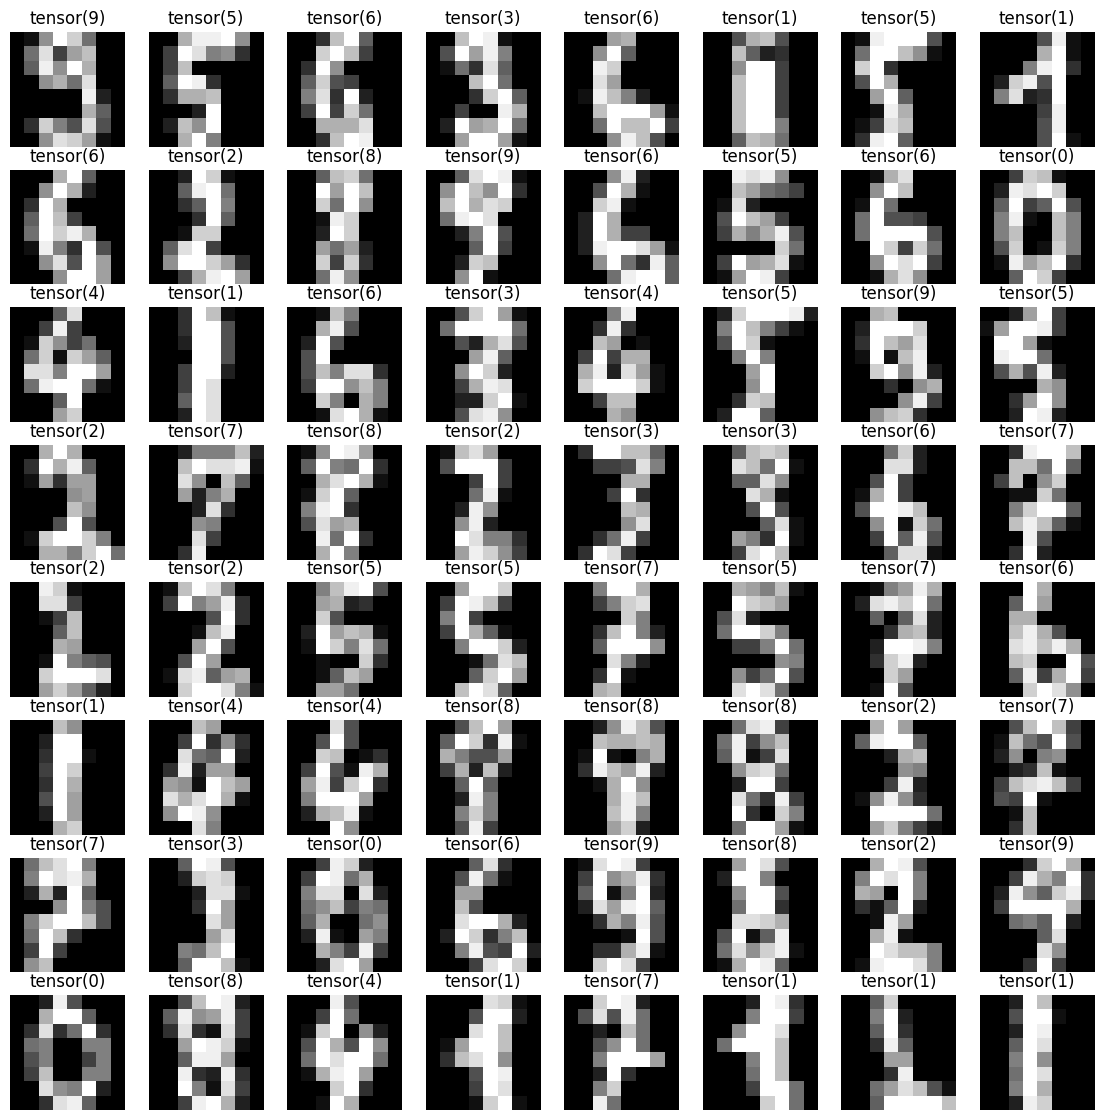

In [8]:
loader = DataLoader(
    dataset = list(zip(x_train, y_train)), # 문제집 데이터(x_train)와 정답 데이터(y_train)를 하나씩 짝지어 전체 데이터셋을 만듭니다.
    batch_size = 64, # 64개씩 데이터를 제공
    shuffle = True, # 데이터 섞임을 True
    drop_last = False # 학습하고 남은 데이터를 버리지 않고 사용한다.
)

# 64개의 img, 정답들을 각각 뽑아준다.
imgs, labels = next(iter(loader)) #iter() iterator로 만들어주는 함수 (순서가 있는 함수 )

# 시각화
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

### ※ axes.flatten()

axes.flatten()은 다차원 배열 형태로 구성된 Matplotlib의 서브플롯 배열을 1차원 배열로 변환하는 메서드입니다. Matplotlib에서 다수의 서브플롯을 생성할 때, plt.subplots()는 2차원 배열 형태로 서브플롯 객체를 반환합니다. 이 배열은 각 서브플롯을 접근하기 위해 행과 열의 인덱스를 사용해야 하지만, flatten() 메서드를 사용하면 이 배열을 1차원으로 펼쳐서 각 서브플롯을 단일 인덱스로 순회할 수 있게 됩니다.

In [9]:
model = nn.Sequential(
    nn.Linear(64, 10) # 64개의 인풋, 10개 아웃풋
)

optimizer = optim.Adam(model.parameters(), lr=0.01) # optimizer

epochs = 50 # 50바퀴동안 학습
for epoch in range(epochs + 1):
    sum_losses = 0 # 전체 lost 값
    sum_accs = 0 # 전체 accuracy 값

    # x_batch 이미지, ybatch 정답
    for x_batch, y_batch in loader:  # loader의 개수만큼 돌기 1437개/64 의 값
        y_pred = model(x_batch) # 이미지를 넣어서 예측
        loss = nn.CrossEntropyLoss()(y_pred, y_batch) # 다항으로 분류

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss # 오차값 누적 업데이트

        y_prob = nn.Softmax(1)(y_pred) # 확률적으로 누가 가장 높은지 뽑기

        y_pred_index = torch.argmax(y_prob, axis=1) # 그 인덱스번호를 이 확률에서 구해주기 (0~9중)

        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100 # accuracy 구하기

        sum_accs = sum_accs + acc # 정확도 누적 업데이트

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/50 Loss: 1.564586 Accuracy: 63.54%
Epoch    1/50 Loss: 0.234516 Accuracy: 92.69%
Epoch    2/50 Loss: 0.147846 Accuracy: 95.64%
Epoch    3/50 Loss: 0.112647 Accuracy: 96.67%
Epoch    4/50 Loss: 0.097826 Accuracy: 97.08%
Epoch    5/50 Loss: 0.079904 Accuracy: 97.89%
Epoch    6/50 Loss: 0.080411 Accuracy: 97.83%
Epoch    7/50 Loss: 0.075675 Accuracy: 97.89%
Epoch    8/50 Loss: 0.072010 Accuracy: 97.62%
Epoch    9/50 Loss: 0.063748 Accuracy: 97.95%
Epoch   10/50 Loss: 0.058293 Accuracy: 98.41%
Epoch   11/50 Loss: 0.039221 Accuracy: 99.25%
Epoch   12/50 Loss: 0.038495 Accuracy: 98.98%
Epoch   13/50 Loss: 0.045188 Accuracy: 98.76%
Epoch   14/50 Loss: 0.035546 Accuracy: 98.82%
Epoch   15/50 Loss: 0.039048 Accuracy: 98.98%
Epoch   16/50 Loss: 0.032877 Accuracy: 99.10%
Epoch   17/50 Loss: 0.029011 Accuracy: 99.32%
Epoch   18/50 Loss: 0.025322 Accuracy: 99.32%
Epoch   19/50 Loss: 0.026882 Accuracy: 99.59%
Epoch   20/50 Loss: 0.021632 Accuracy: 99.66%
Epoch   21/50 Loss: 0.019608 Accur

tensor(5)


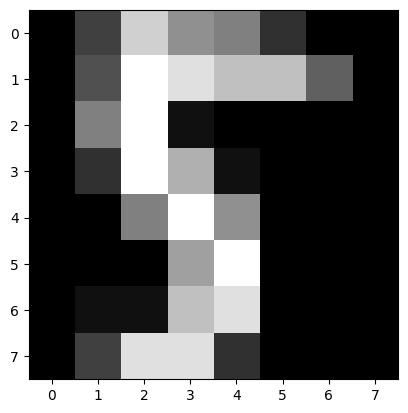

In [11]:
# 테스트 데이터 중 10번쨰 있는걸 가져온다.
# 8 * 8 로 바꿔준다.
# cmap 으로 바꾼뒤 화면에 띄어준다.
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')
print(y_test[10])

In [12]:
# 테스트를 통째로 모델에 넣어준다.
y_pred = model(x_test)
y_pred[10] # y test의 10번째는?

# weight의 의한 값들이 쭉 나온다.

tensor([-0.9714, -3.9223, -0.9738,  3.2295, -0.2516, 16.9421, -1.1092,  5.5465,
         6.5005, -3.9272], grad_fn=<SelectBackward0>)

In [14]:
y_prob = nn.Softmax(1)(y_pred) # 1은 행을 의미하고 0은 열을 의미한다. 따라서 이건 행을 가져온다.
y_prob[10] # 확율을 가져온다.

tensor([1.6607e-08, 8.6836e-10, 1.6567e-08, 1.1084e-06, 3.4108e-08, 9.9996e-01,
        1.4469e-08, 1.1245e-05, 2.9191e-05, 8.6412e-10],
       grad_fn=<SelectBackward0>)

In [15]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[10][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 1.00
숫자 6일 확률: 0.00
숫자 7일 확률: 0.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [17]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  96.39% 입니다.
